In [1]:
# data manipulation
import pandas as pd
import numpy as np

# visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# modelling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# warnings
import warnings

In [8]:
# Update the path to the correct location of the file
df = pd.read_csv('../data/extracted_nba_players_data.csv')
# Display the first few rows of the dataframe
df.head()

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,min_played,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,986.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,941.5,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,1132.2,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,672.8,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,552.0,0.391304


###

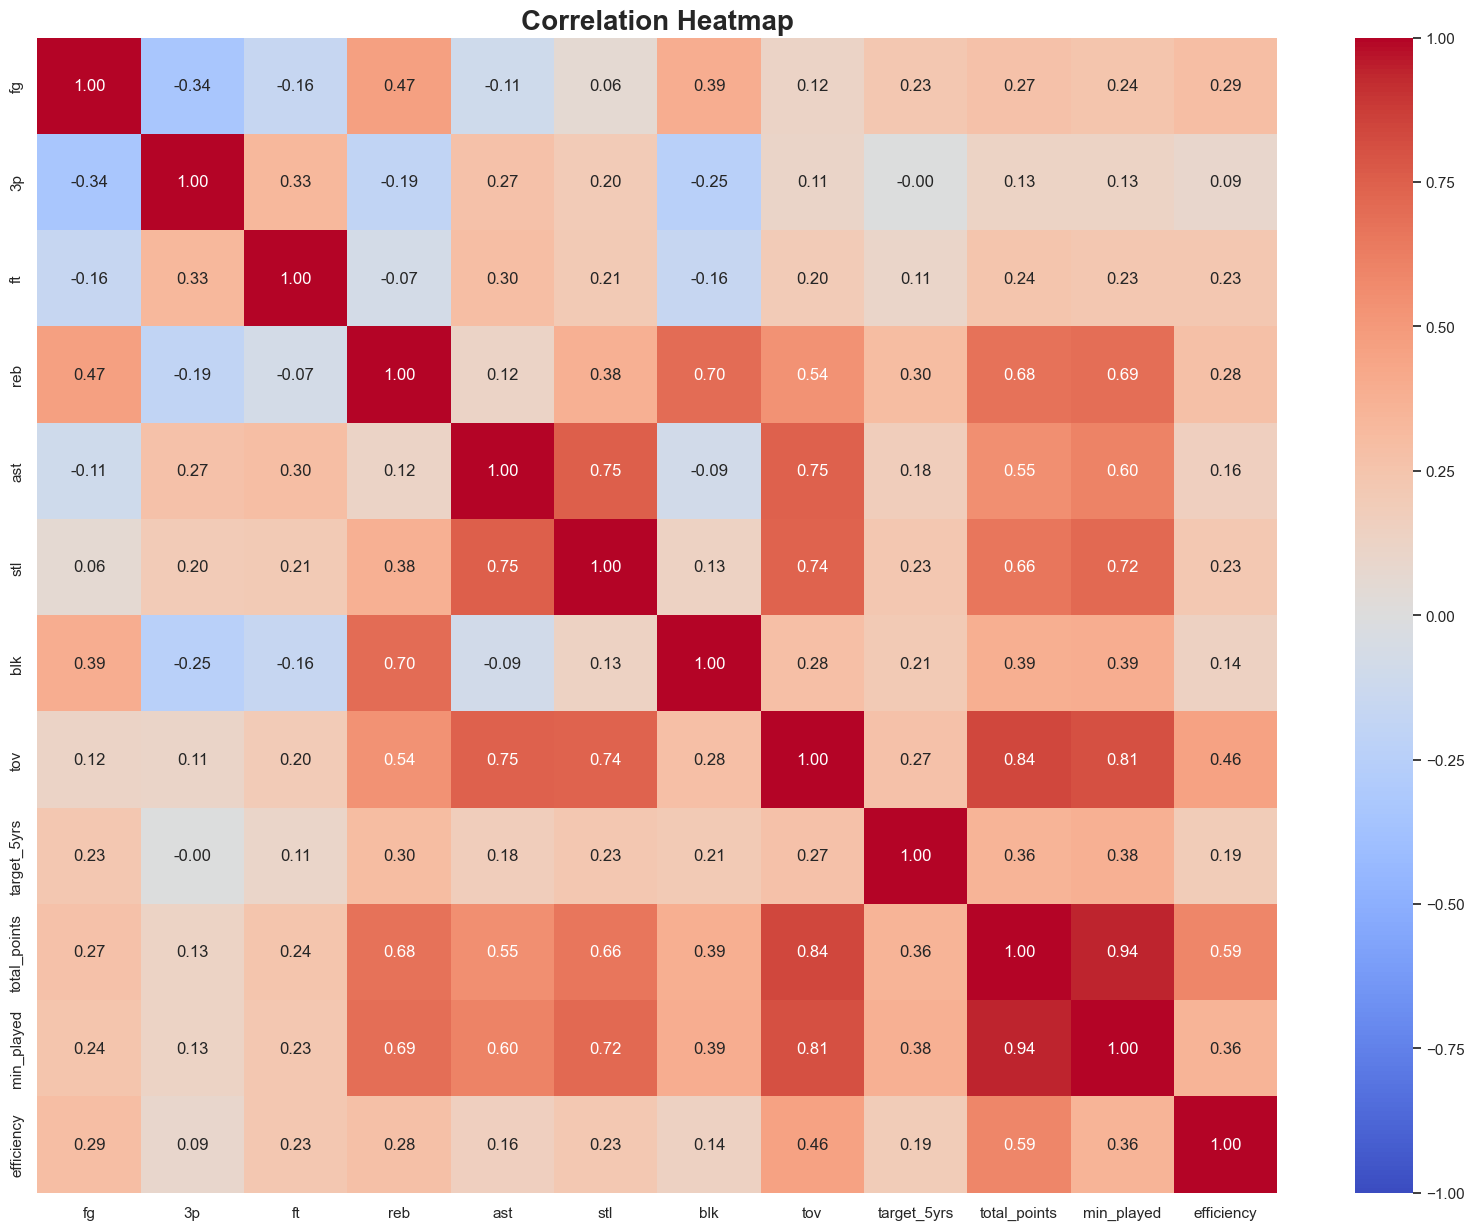

In [9]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap', fontdict={'fontsize': 20, 'fontweight': 'bold'});

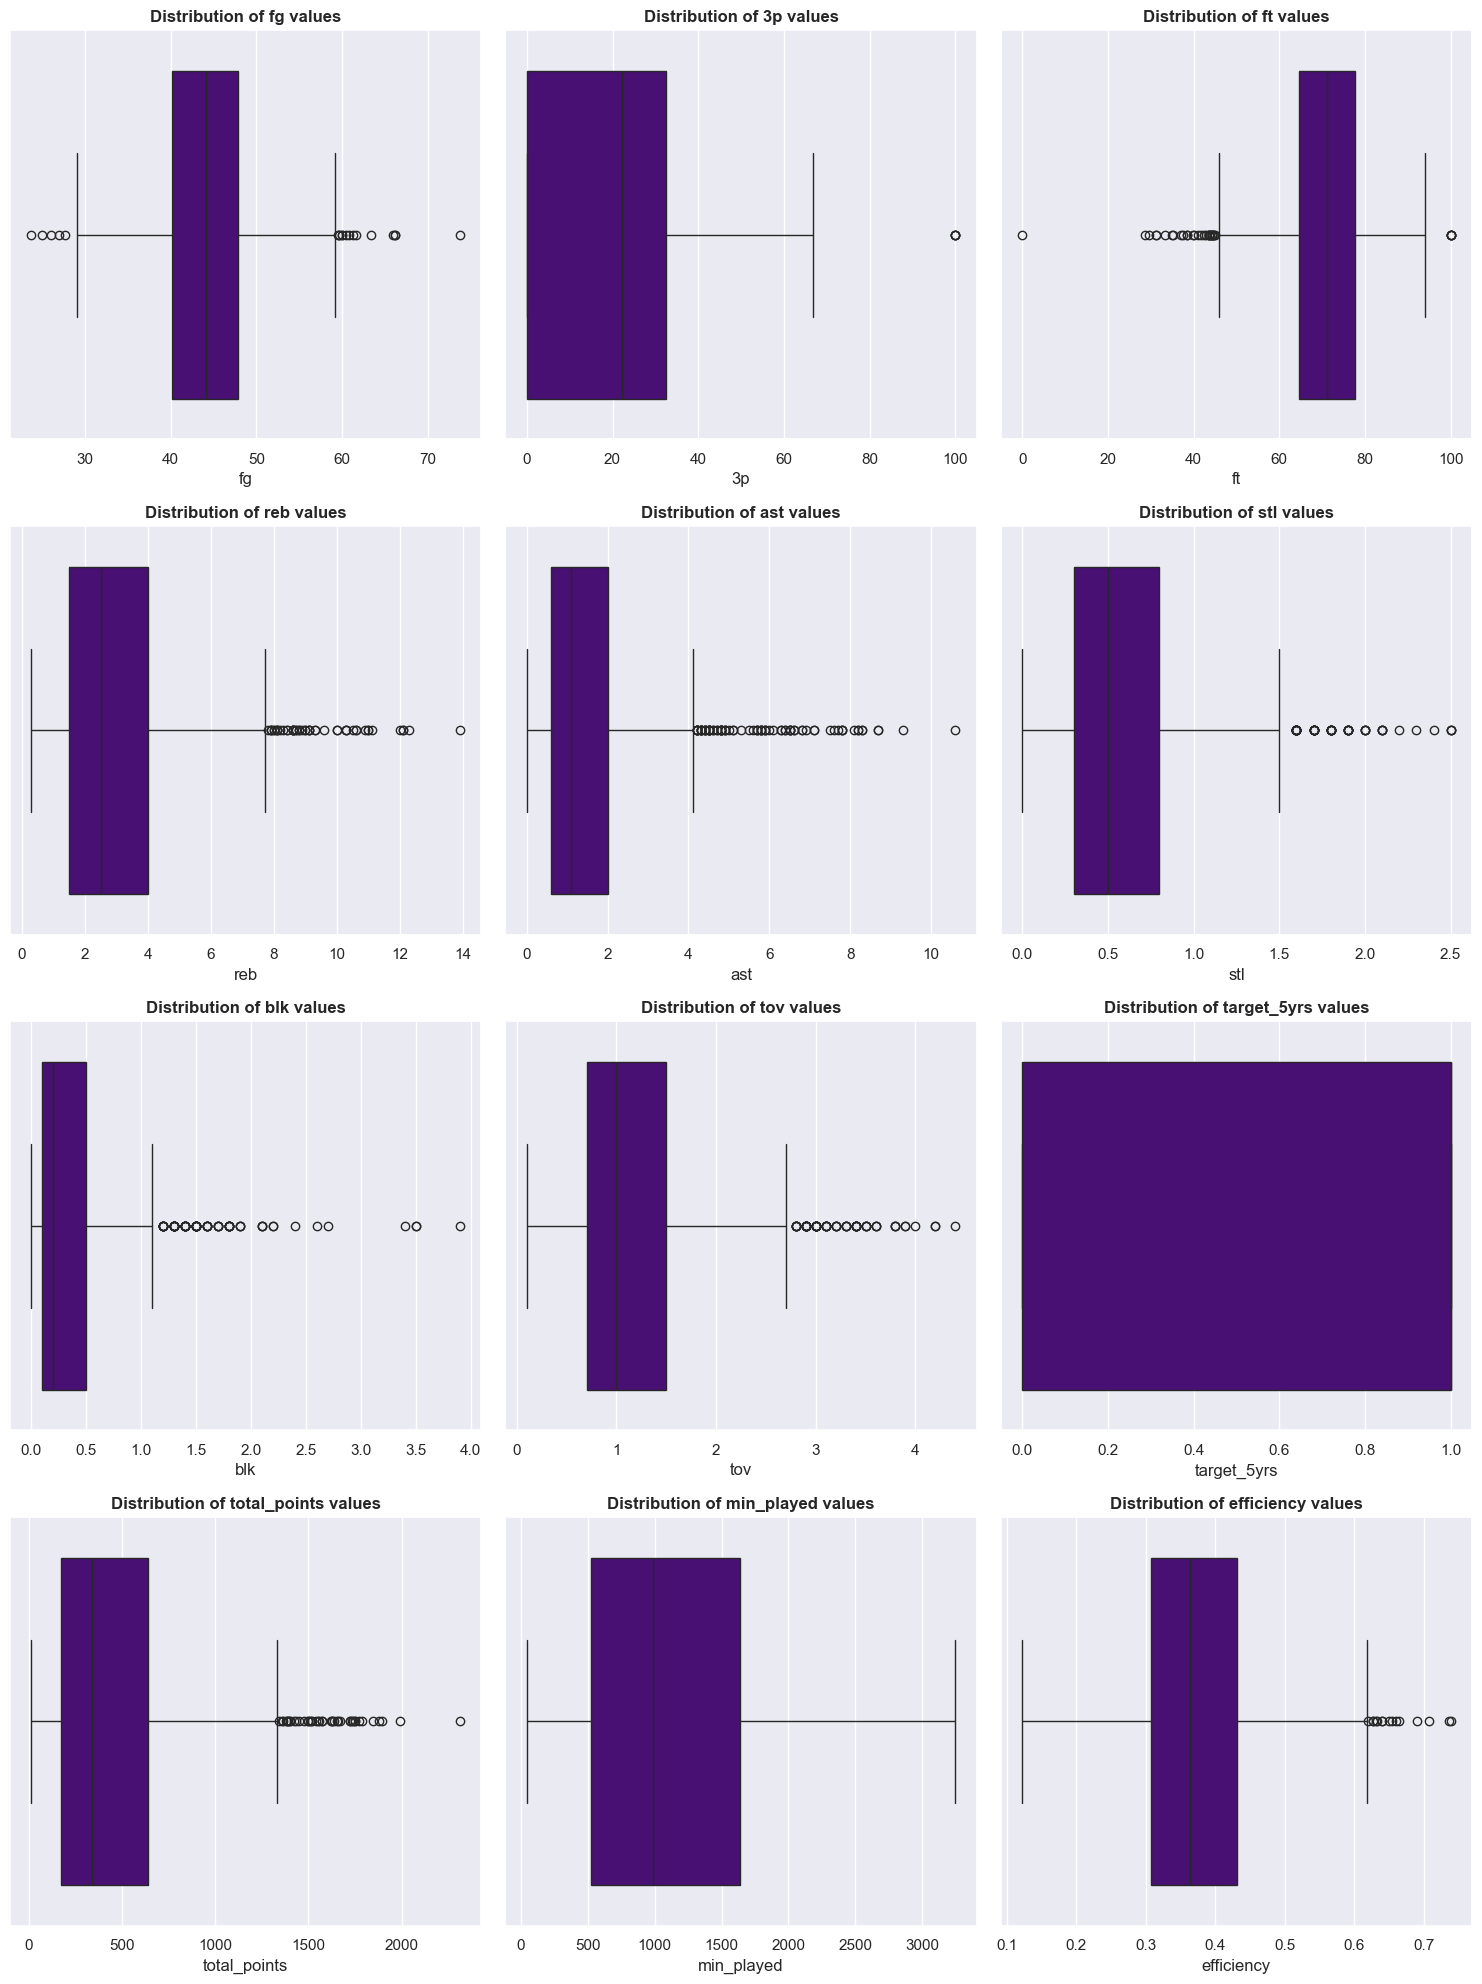

In [10]:
n = 1
plt.figure(figsize=(15, 20))
for i in df.columns:
    plt.subplot(4, 3, n)
    sns.boxplot(df, x=i, color='indigo')
    plt.title(f"Distribution of {i} values", fontdict={'fontsize': 12, 'fontweight': 'bold'})
    n += 1
plt.tight_layout();

In [11]:
# split data
X = df.drop(columns=['target_5yrs'])
y = df['target_5yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [12]:
df['target_5yrs'].head()

0    0
1    0
2    0
3    1
4    1
Name: target_5yrs, dtype: int64

In [13]:
X.head()

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,min_played,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,986.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,941.5,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,1132.2,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,672.8,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,552.0,0.391304


In [14]:
warnings.filterwarnings('ignore')
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.71
Precision: 0.75
Recall: 0.80
F1 Score: 0.78


In [16]:
model_eval = pd.DataFrame({'model': ['Logistic Regression'],
                         'accuracy': [acc],
                         'precision': [prec],
                         'recall': [rec],
                         'f1_score': [f1]})

In [17]:
model_eval

,model,accuracy,precision,recall,f1_score
0,Logistic Regression,0.713433,0.752252,0.802885,0.776744


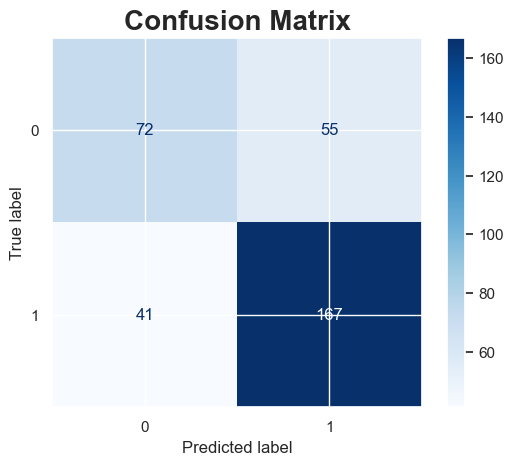

In [18]:
def logistic_cm(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    plt.show()

logistic_cm(model, X_test, y_test)

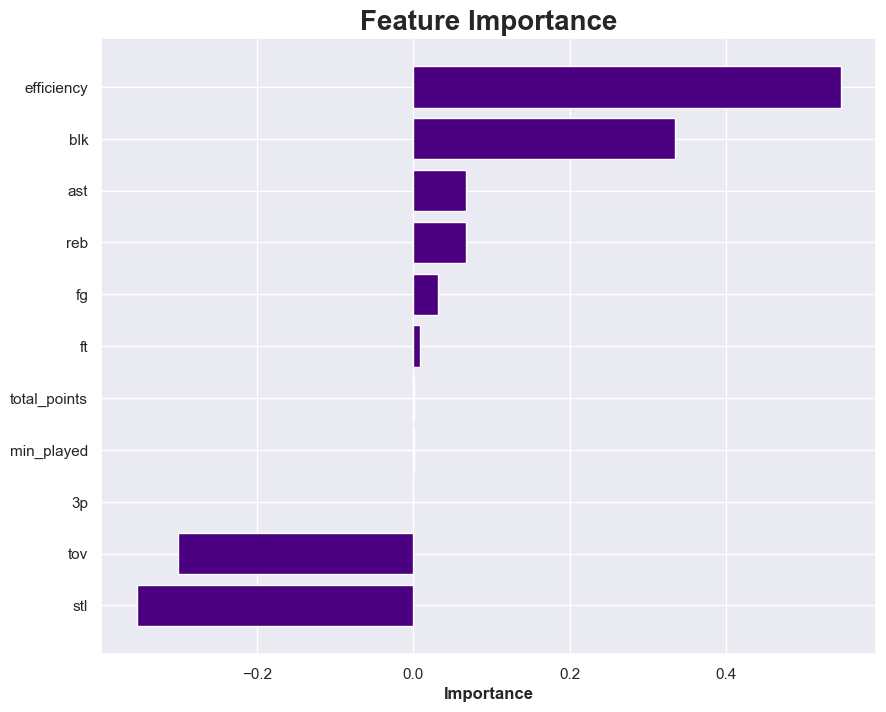

In [19]:
# Feature importance
importance = pd.DataFrame({'feature': X.columns, 'importance': model.coef_[0]})
importance = importance.sort_values(by='importance', ascending=False)
importance.reset_index(drop=True, inplace=True)
plt.figure(figsize=(10, 8))
plt.barh(importance['feature'], importance['importance'], color='indigo')
plt.xlabel('Importance', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Feature Importance', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.gca().invert_yaxis()
plt.show();

### Work with impotant features
* 2nd Logistic Regression with important features

In [20]:
df1 = df[['target_5yrs', 'efficiency', 'blk', 'ast', 'reb', 'fg', 'ft', '3p', 'tov', 'stl']].copy()
df1.head(10)

,target_5yrs,efficiency,blk,ast,reb,fg,ft,3p,tov,stl
0,0,0.270073,0.4,1.9,4.1,34.7,69.9,25.0,1.3,0.4
1,0,0.267658,0.5,3.7,2.4,29.6,76.5,23.5,1.6,1.1
2,0,0.339869,0.3,1.0,2.2,42.2,67.0,24.4,1.0,0.5
3,1,0.491379,0.1,0.8,1.9,42.6,68.9,22.6,1.0,0.6
4,1,0.391304,0.4,0.3,2.5,52.4,67.4,0.0,0.8,0.3
5,0,0.324561,0.0,1.8,0.8,42.3,73.2,32.5,0.7,0.4
6,1,0.605505,0.1,0.6,2.0,43.5,81.1,50.0,0.7,0.2
7,1,0.553398,0.1,0.2,1.7,41.5,87.5,30.0,0.7,0.2
8,0,0.242424,0.0,2.3,0.8,39.2,71.4,23.3,1.1,0.3
9,0,0.435294,0.0,0.3,1.1,38.3,67.8,21.4,0.7,0.2


In [21]:
X1 = df1.drop(columns=['target_5yrs'])
y1 = df1['target_5yrs']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42, stratify=y1)

In [22]:
model1 = LogisticRegression(max_iter=1000, random_state=42)
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

In [23]:
acc1 = accuracy_score(y1_test, y1_pred)
prec1 = precision_score(y1_test, y1_pred)
rec1 = recall_score(y1_test, y1_pred)
f1_1 = f1_score(y1_test, y1_pred)
print(f"Accuracy: {acc1:.2f}")
print(f"Precision: {prec1:.2f}")
print(f"Recall: {rec1:.2f}")
print(f"F1 Score: {f1_1:.2f}")

Accuracy: 0.68
Precision: 0.71
Recall: 0.81
F1 Score: 0.76


In [24]:
model_eval1 = pd.DataFrame({'model': ['Logistic Regression'],
                         'accuracy': [acc1],
                         'precision': [prec1],
                         'recall': [rec1],
                         'f1_score': [f1_1]})

In [25]:
model_evaluation = pd.concat([model_eval, model_eval1], axis=0)
model_evaluation.reset_index(drop=True, inplace=True)

In [26]:
model_evaluation

,model,accuracy,precision,recall,f1_score
0,Logistic Regression,0.713433,0.752252,0.802885,0.776744
1,Logistic Regression,0.677612,0.710084,0.812500,0.757848


In [27]:
# save model
import pickle
path = r'../models/'
with open(path + 'logistic_model.pkl', 'wb') as file:
    pickle.dump(model, file)
with open(path + 'logistic_model1.pkl', 'wb') as file:
    pickle.dump(model1, file)